# Fig. S2. Convergent connectivity mapping of antidepressant effects without weighting by sample size

In [1]:
# set_env.py is not included in the repo
# it defines $HCP_DENSE_PATH, $PROJECT_DIR (required) and $HCP_DIR (optional)
# in environment variables
import set_env

In [43]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nilearn.plotting
import surfplot
import pyvirtualdisplay

# create virtual display for plotting meshes in remote servers
disp=pyvirtualdisplay.Display(visible=False)
disp.start()

sys.path.append('../scripts')
from helpers import io, transform, plot, stats
from ccm import ccm

plt.rcParams.update({"font.size": 12, "font.family": "Asana Math", "figure.dpi": 192})

## Top. Tr+

### Left. Convergent connectivity map plot

In [3]:
zmap_inc = ccm.ccm_random('Contrast', 'Untreated<Treated', n_perm=1000, weighted=True)

Results will be saved in /data/group/cng/Projects/Amin/antidepressants_ale/public/scripts/helpers/../../results/ccm/ccm_random_weighted_n-1000/Contrast/Untreated<Treated


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Calculating true FC


100%|████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 35.59it/s]


Points: 177 of 179
Closest distance of included points (in mm)
 count    177.000000
mean       3.064596
std        2.197378
min        0.000000
25%        1.319487
50%        2.536294
75%        4.401762
max        9.254325
dtype: float64


100%|████████████████████████████████████████████████████████████| 1000/1000 [01:25<00:00, 11.73it/s]


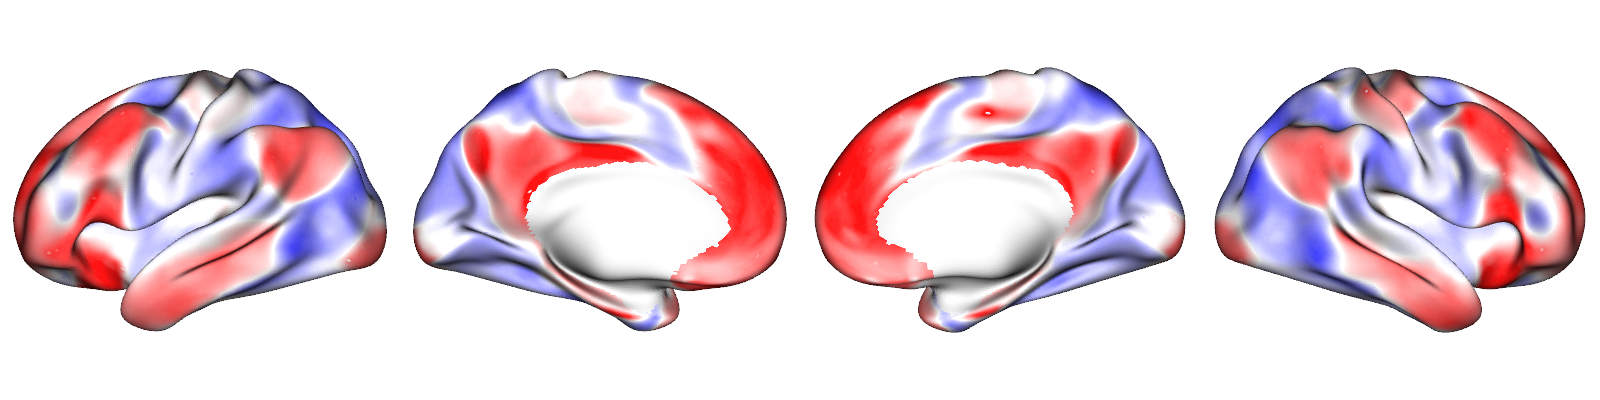

In [4]:
# calculate whole-brain (cortical+subcortical) color range
vmin = min(np.nanmin(zmap_inc), -np.nanmax(zmap_inc))
vmax = -vmin
# convert cortical to fsLR and plot
zmap_inc_fslr = transform.cifti_to_fsLR(zmap_inc)
plot.plot_surface(zmap_inc_fslr, cmap='seismic_light', nan_color=(0.9, 0.9, 0.9, 1), vrange=(vmin, vmax))

/data/group/cng/Projects/Amin/antidepressants_ale/venv/lib/python3.11/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


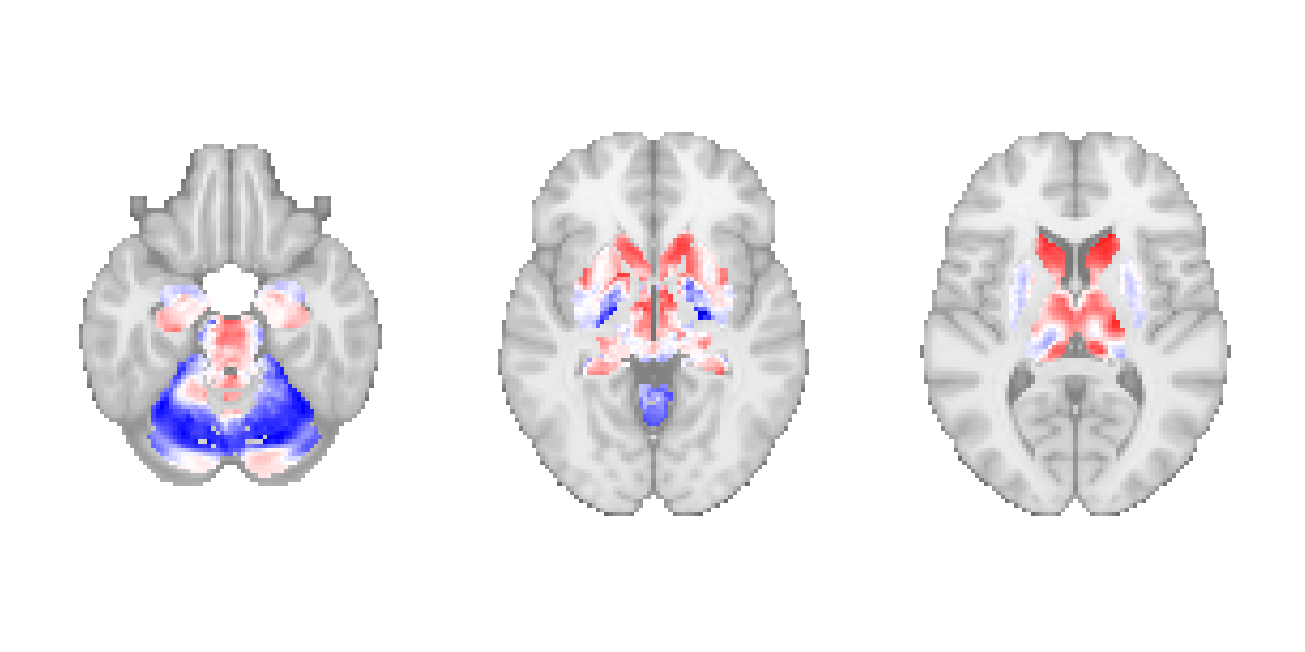

In [5]:
zmap_inc_mni = transform.cifti_to_mni(zmap_inc, exc_cortex=True)
nilearn.plotting.plot_stat_map(zmap_inc_mni, display_mode='z', cut_coords=[-22, -4, 8], 
                               cmap='seismic_light', vmax=vmax, colorbar=False, annotate=False)

In [6]:
print(-vmax, vmax)

-3.0905291379252677 3.0905291379252677


### Right. Convergent connectivity to resting-state networks

In [29]:
true_fc = np.load(os.path.join(io.RESULTS_DIR, 'ccm', 
                       'ccm_random_weighted_n-1000',
                       'Contrast', 'Untreated<Treated', 'true_fc-mean.npy'
                  ))
null_fcs = np.load(os.path.join(io.RESULTS_DIR, 'ccm', 
                       'ccm_random_weighted_n-1000',
                       'Contrast', 'Untreated<Treated', 'null_fcs.npy'
                  ))

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
/data/group/cng/Projects/Amin/antidepressants_ale/public/scripts/figures/../ccm/ccm.py:316: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  true_fc_yeo = pd.DataFrame(true_fc_fslr, index=yeo_map.categorical).reset_index().groupby('index').mean()
/data/group/cng/Projects/Amin/antidepressants_ale/public/scripts/figures/../ccm/ccm.py:317: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  null_fcs_yeo = pd.DataFrame(null

,mean,p_vals
VIS,0.244032,0.871795
SMN,0.282048,0.871795
DAN,0.215381,0.899101
SAN,0.234796,0.871795
LIM,0.182360,0.300699
FPN,0.225834,0.286713
DMN,0.238507,0.076923


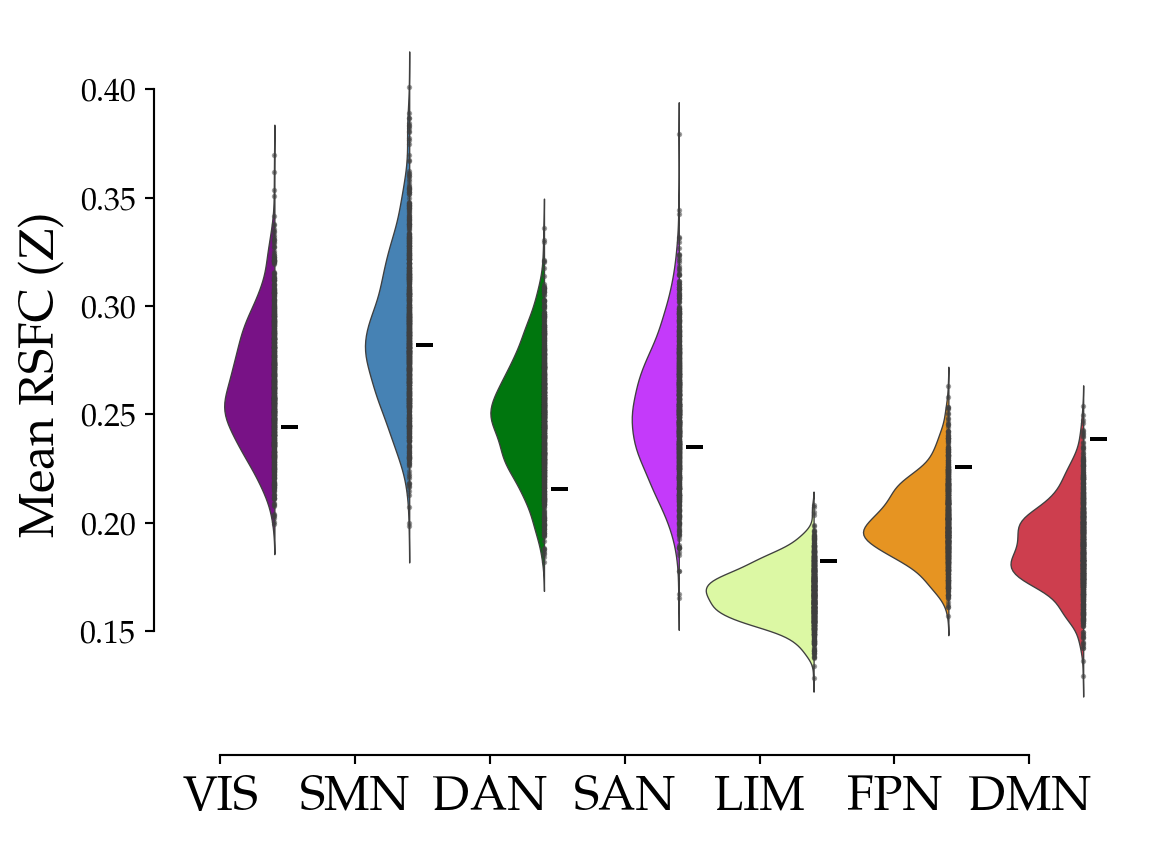

In [32]:
fig, ax = plt.subplots()
p_vals, true_fc_yeo , _ = ccm.ccm_yeo(true_fc, null_fcs, ax=ax)
yeo_map = io.load_yeo_map()
pd.DataFrame({'mean': true_fc_yeo.values.flatten(), 'p_vals': p_vals.values.flatten()}, index=yeo_map.shortnames[1:])

## Bottom. Tr-

In [12]:
zmap_dec = ccm.ccm_random('Contrast', 'Untreated>Treated', n_perm=1000, weighted=True)

Results will be saved in /data/group/cng/Projects/Amin/antidepressants_ale/public/scripts/helpers/../../results/ccm/ccm_random_weighted_n-1000/Contrast/Untreated>Treated


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Calculating true FC


100%|████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 28.82it/s]


Points: 206 of 213
Closest distance of included points (in mm)
 count    206.000000
mean       2.683793
std        2.184041
min        0.000000
25%        1.009440
50%        1.815767
75%        3.956532
max        9.451604
dtype: float64


100%|████████████████████████████████████████████████████████████| 1000/1000 [01:37<00:00, 10.22it/s]


### Left. Convergent connectivity map plot

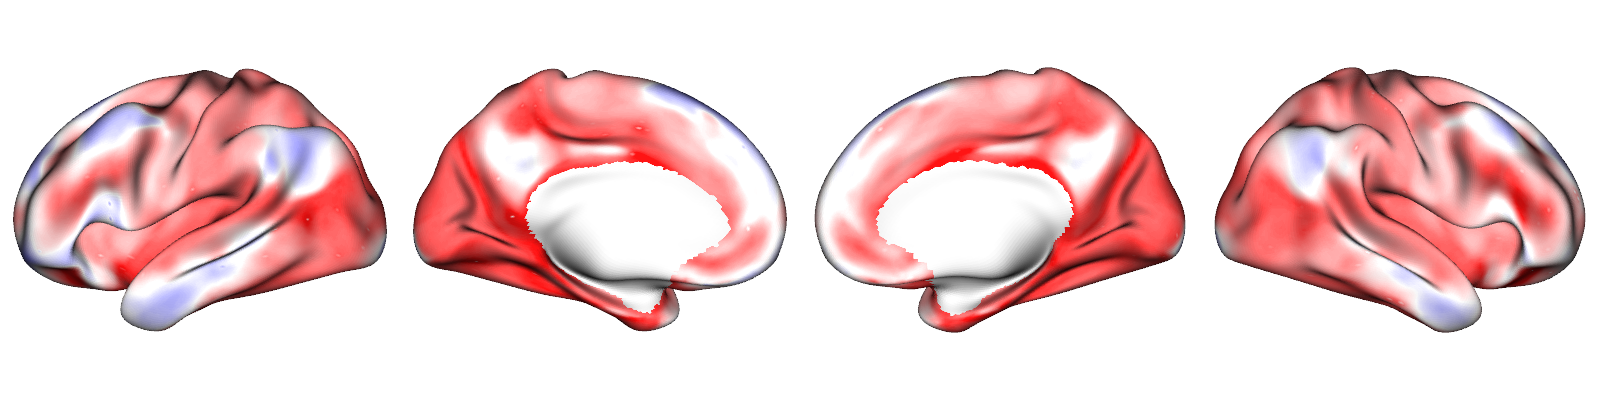

In [13]:
# calculate whole-brain (cortical+subcortical) color range
vmin = min(np.nanmin(zmap_dec), -np.nanmax(zmap_dec))
vmax = -vmin
# convert cortical to fsLR and plot
zmap_dec_fslr = transform.cifti_to_fsLR(zmap_dec)
plot.plot_surface(zmap_dec_fslr, cmap='seismic_light', nan_color=(0.9, 0.9, 0.9, 1), vrange=(vmin, vmax))

/data/group/cng/Projects/Amin/antidepressants_ale/venv/lib/python3.11/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


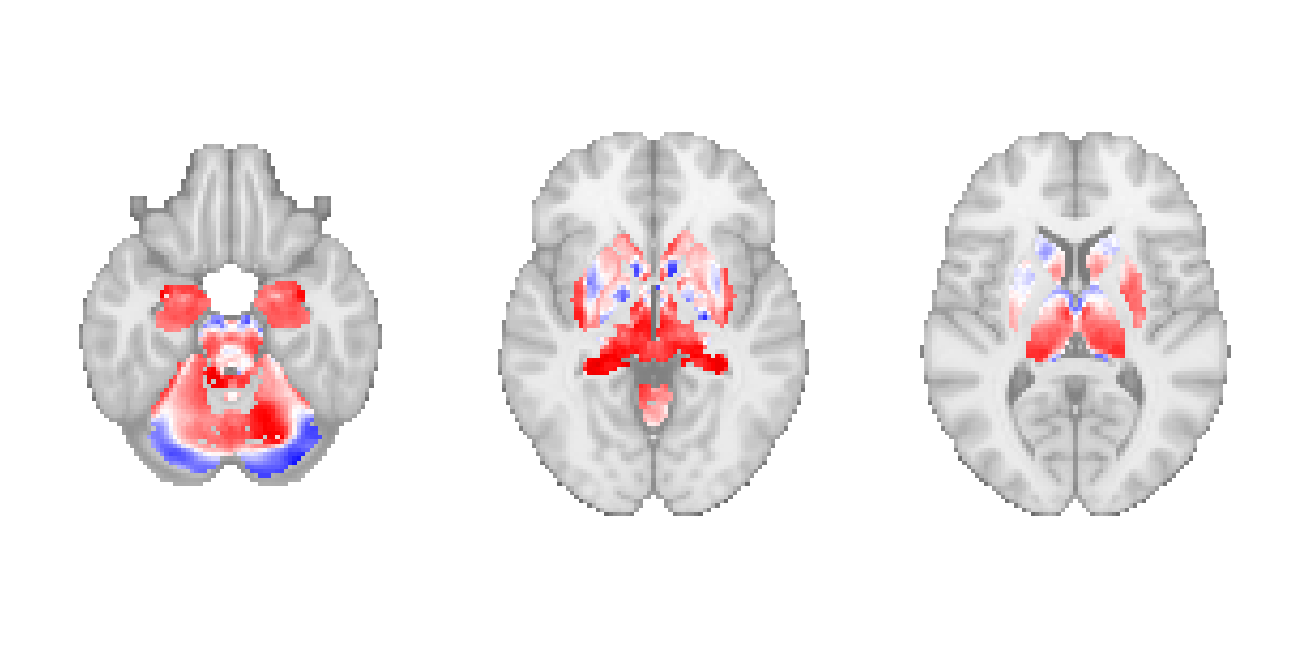

In [14]:
zmap_dec_mni = transform.cifti_to_mni(zmap_dec, exc_cortex=True)
nilearn.plotting.plot_stat_map(zmap_dec_mni, display_mode='z', cut_coords=[-22, -4, 8], 
                               cmap='seismic_light', vmax=vmax, colorbar=False, annotate=False)

In [15]:
print(-vmax, vmax)

-3.0905291379252677 3.0905291379252677


### Right. Convergent connectivity to resting-state networks

In [36]:
true_fc = np.load(os.path.join(io.RESULTS_DIR, 'ccm', 
                       'ccm_random_weighted_n-1000',
                       'Contrast', 'Untreated>Treated', 'true_fc-mean.npy'
                  ))
null_fcs = np.load(os.path.join(io.RESULTS_DIR, 'ccm', 
                       'ccm_random_weighted_n-1000',
                       'Contrast', 'Untreated>Treated', 'null_fcs.npy'
                  ))

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
/data/group/cng/Projects/Amin/antidepressants_ale/public/scripts/figures/../ccm/ccm.py:316: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  true_fc_yeo = pd.DataFrame(true_fc_fslr, index=yeo_map.categorical).reset_index().groupby('index').mean()
/data/group/cng/Projects/Amin/antidepressants_ale/public/scripts/figures/../ccm/ccm.py:317: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  null_fcs_yeo = pd.DataFrame(null

,mean,p_vals
VIS,0.311969,0.116084
SMN,0.322709,0.116084
DAN,0.283050,0.116084
SAN,0.283623,0.116084
LIM,0.184707,0.116084
FPN,0.217128,0.139860
DMN,0.197139,0.295704


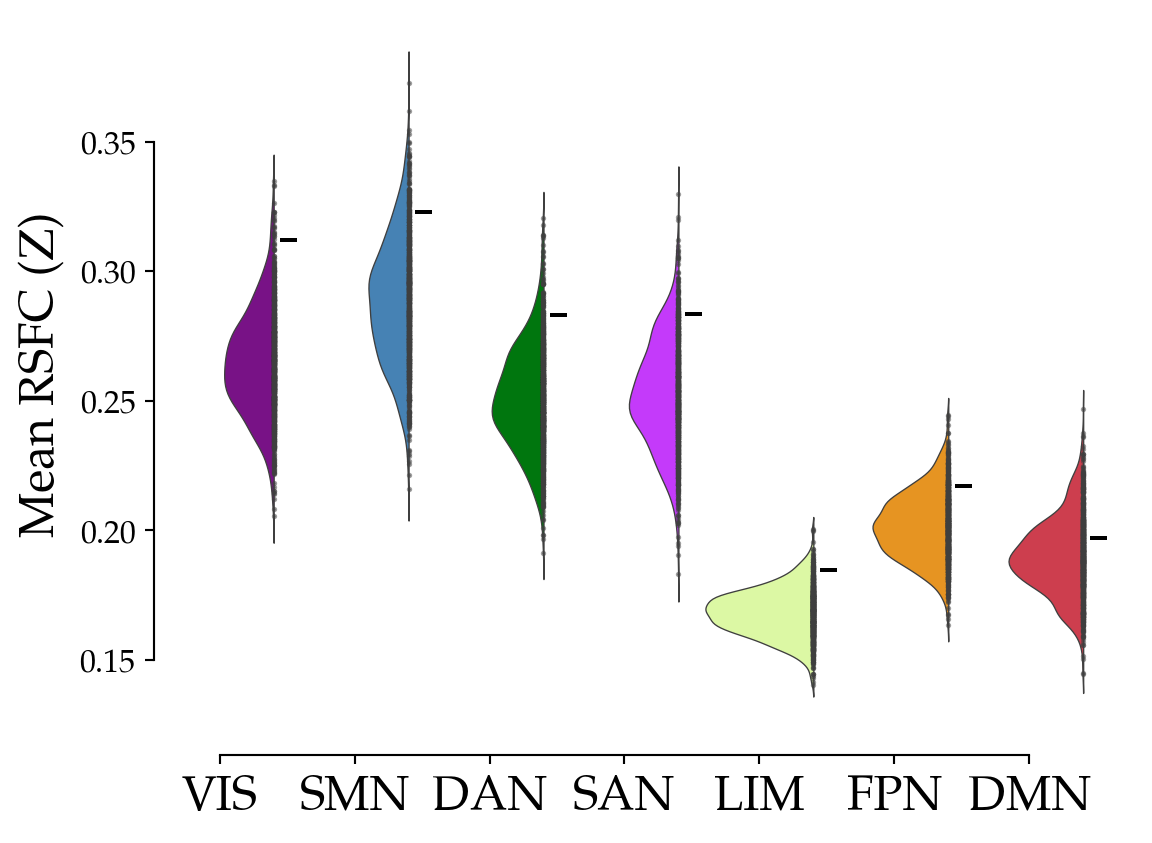

In [40]:
fig, ax = plt.subplots()
p_vals, true_fc_yeo , _ = ccm.ccm_yeo(true_fc, null_fcs, ax=ax)
yeo_map = io.load_yeo_map()
pd.DataFrame({'mean': true_fc_yeo.values.flatten(), 'p_vals': p_vals.values.flatten()}, index=yeo_map.shortnames[1:])

## Text. Cross-correlation of CCMs

In [44]:
zmap_all = ccm.ccm_random('All', n_perm=1000, weighted=True)
# parcellate cortex to Schaefer-400 and subcortex to Tian-S2
zmaps_parc = transform.parcellate_cifti(np.vstack([zmap_all, zmap_inc, zmap_dec]), schaefer='400', tian='S2')
zmaps_parc.columns = ['all', 'inc', 'dec']
# calculate correlation of the maps while correcting for SA using variograms
coefs, pvals, null_distribution = stats.variogram_test(
    zmaps_parc, zmaps_parc, 
    n_perm=1000, 
    surrogates_path='./ccm_all_inc_dec_schaefer-400_tian-S2_n-1000_variograms.npz'
)

Already done!
Surrogates already exist in ./ccm_all_inc_dec_schaefer-400_tian-S2_n-1000_variograms.npz


In [45]:
print(f"All ~ Inc: r = {coefs.loc['all', 'inc']}, p = {pvals.loc['all', 'inc']}")
print(f"All ~ Dec: r = {coefs.loc['all', 'dec']}, p = {pvals.loc['all', 'dec']}")
print(f"Inc ~ Dec: r = {coefs.loc['inc', 'dec']}, p = {pvals.loc['inc', 'dec']}")

All ~ Inc: r = 0.4847778679172843, p = 0.000999000999000999
All ~ Dec: r = 0.0508999962625666, p = 0.7322677322677322
Inc ~ Dec: r = -0.571495719582325, p = 0.000999000999000999
